# CS 109A/STAT 121A/AC 209A 

## Lab 2: Cleaning and EDA of Goodreads 

**Harvard University**<br>
**Fall 2017**<br>
**Instructors: Pavlos Protopapas, Kevin Rader, Rahul Dave, Margo Levine**

---

# Table of Contents 
<ol start="0">
<li> Learning Goals </li>
<li> Loading and Cleaning with Pandas</li>
<li> Asking Questions?  </li>
<li> Parsing and Completing the Dataframe  </li>
<li> EDA  </li>
<li> Determining the Best Books  </li>
<li>Trends in Popularity of Genres </li>
</ol>

## Learning Goals

About 6000 odd "best books" were fetched and parsed from [Goodreads](https://www.goodreads.com). The "bestness" of these books came from a proprietary formula used by Goodreads and published as a list on their web site.

We parsed the page for each book and saved data from all these pages in a tabular format as a CSV file. In this lab we'll clean and further parse the data.  We'll then do some exploratory data analysis to answer questions about these best books and popular genres.  


By the end of this lab, you should be able to:

- Load and systematically address missing values, ancoded as `NaN` values in our data set, for example, by removing observations associated with these values.
- Parse columns in the dataframe to create new dataframe columns.
- Create and interpret visualizations to explore the data set

*This lab corresponds to lectures 2 and 3 and maps on to homework 1 and further.*

### Basic EDA workflow

(From the lecture, repeated here for convenience).

The basic workflow is as follows:

1. **Build** a DataFrame from the data (ideally, put all data in this object)
2. **Clean** the DataFrame. It should have the following properties:
    - Each row describes a single object
    - Each column describes a property of that object
    - Columns are numeric whenever appropriate
    - Columns contain atomic properties that cannot be further decomposed
3. Explore **global properties**. Use histograms, scatter plots, and aggregation functions to summarize the data.
4. Explore **group properties**. Use groupby and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to followup in subsequent analysis.

## Part 1: Loading and Cleaning with Pandas 
Read in the `goodreads.csv` file, examine the data, and do any necessary data cleaning. 

Here is a description of the columns (in order) present in this csv file:

```
rating: the average rating on a 1-5 scale achieved by the book
review_count: the number of Goodreads users who reviewed this book
isbn: the ISBN code for the book
booktype: an internal Goodreads identifier for the book
author_url: the Goodreads (relative) URL for the author of the book
year: the year the book was published
genre_urls: a string with '|' separated relative URLS of Goodreads genre pages
dir: a directory identifier internal to the scraping code
rating_count: the number of ratings for this book (this is different from the number of reviews)
name: the name of the book
```

Report all the issues you found with the data and how you resolved them.  

[15 minutes]

----

Load the appropriate libraries

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

### Cleaning: Reading in the data
We read in and clean the data from `goodreads.csv`.  Try directly loading the data from file and see what the dataframe look like. What's the problem with naively loading the data as is? You might want to open the CSV file in Excel or your favorite text editor to see how this dataset is formatted.

In [2]:
#Read the data into a dataframe
%cd desktop/a-2017-master/Labs/lab2_worked_eda
df = pd.read_csv("data/goodreads.csv")

#Examine the first couple of rows of the dataframe
####### 
df.head()
####### 

C:\Users\jose\desktop\a-2017-master\Labs\lab2_worked_eda


,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.Suzanne_Collins,2008,/genres/young-adult|/genres/science-fiction|/genres/dystopia|/genres/fantasy|/genres/science-fiction|/genres/romance|/genres/adventure|/genres/book-club|/genres/young-adult|/genres/teen|/genres/apocalyptic|/genres/post-apocalyptic|/genres/action,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)"
0,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...
1,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)"
2,4.23,47906,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird
3,4.23,34772,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice
4,4.25,12363,0446675539,good_reads:book,https://www.goodreads.com/author/show/11081.Ma...,1936.0,/genres/classics|/genres/historical-fiction|/g...,dir01/18405.Gone_with_the_Wind.html,645470,Gone with the Wind


Lets read the csv file with custom column descriptions specified in the problem statement.

In [3]:
df=pd.read_csv("data/goodreads.csv", header=None,
               names=["rating", 'review_count', 'isbn', 'booktype',
                      'author_url', 'year', 'genre_urls', 'dir','rating_count', 'name'])

#Examine the first couple of rows of the dataframe
####### 
df.head()
####### 

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
0,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008.0,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)"
1,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...
2,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)"
3,4.23,47906,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird
4,4.23,34772,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice


### Cleaning: Examing the dataframe - quick checks

We should examine the dataframe to get a overall sense of the content.

In [4]:
#Start by check the column data types
####### 
df.dtypes
####### 

rating          float64
review_count     object
isbn             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

There are a couple more quick sanity checks to perform on the dataframe. 

In [5]:
#Come up with a few other important properties of the dataframe to check
####### 
# check summary statistics of numeric variables
df.describe()
####### 

,rating,year
count,5998.000000,5993.000000
mean,4.042201,1969.085099
std,0.260661,185.383169
min,2.000000,-1500.000000
25%,3.870000,1980.000000
50%,4.050000,2002.000000
75%,4.210000,2009.000000
max,5.000000,2014.000000


Apart from some missing values, nothing appears out of the ordinary (assuming the negative value for year means the year is BC). Next, we'll check the values of review_count and rating_count - based on the column definitions, they should be cast as numeric columns but they're not. Let's find the non-numeric entries:

In [6]:
# test_int will be applied onto the columns and will attempt to cast every entry as an int. 
# The false values will tell us which rows have non-numeric entries for each.
def test_int(n):
    try:
        int(n)
        return True
    except:
        return False
    
checked_ints = df[['review_count', 'rating_count']].applymap(test_int)
checked_ints.describe()

,review_count,rating_count
count,6000,6000
unique,2,2
top,True,True
freq,5998,5998


In [7]:
# This slice gives us the rows where either review_count isn't an integer, or rating_count isn't an integer
df.loc[~(checked_ints.review_count & checked_ints.rating_count), :]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
3643,NaN,None,None,None,None,NaN,NaN,dir37/9658936-harry-potter.html,None,None
5282,NaN,None,None,None,None,NaN,NaN,dir53/113138.The_Winner.html,None,None


It appears that none of the information for these books was in the original csv.

Of the remaining columns, we can reasonably expect the following:

* isbn should consist mostly of integers, but some codes will end in an X
* booktype should be a categorical variable
* author_url, genre_urls, and dir should all be strings with patterns (author_url starts with 'https://www.goodreads...', genre_url is of the form 'genres/x|/genres/y|/...', dir starts with 'dir...')
* name should be a string

The two rows above are empty except for dir. For now, we'll check that booktype is categorical and that the isbn codes are what we'd expect.

In [8]:
df.booktype.unique()

array(['good_reads:book', 'None'], dtype=object)

In [9]:
df.loc[df.booktype == 'None', :]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
3643,NaN,None,None,None,None,NaN,NaN,dir37/9658936-harry-potter.html,None,None
5282,NaN,None,None,None,None,NaN,NaN,dir53/113138.The_Winner.html,None,None


These are the same rows we found before. Now we'll check the entries of isbn:

In [10]:
def test_isbn(s):
    try:
        int(s)
        return True
    except:
        if str(s)[-1] == 'X':
            return True
        else:
            return False
        
checked_isbn = df.isbn.apply(test_isbn)
checked_isbn.describe()

count     6000
unique       2
top       True
freq      5523
Name: isbn, dtype: object

We can look at the other values that isbn takes on:

In [11]:
df.loc[~checked_isbn, 'isbn'].unique()

array([nan, 'None'], dtype=object)

In [12]:
df.loc[~checked_isbn, 'isbn'].describe()

count        2
unique       1
top       None
freq         2
Name: isbn, dtype: object

We know from above that where the 'None' entries come from. The rest are missing values.

**Was the data read correctly and values represented as we expected?** For the most part, the data seems to have been read correctly and the values were represented with the right type. At some point, we might want to cast year as a date but for now it's fine as is. 

### Cleaning: Examining the dataframe - a deeper look

Beyond performing checking some quick general properties of the data frame and looking at the first $n$ rows, we can dig a bit deeper into the values being stored. If you haven't already, check to see if there are any missing values in the data frame.

In [13]:
#Get a sense of how many missing values there are in the dataframe.
#######
df.count()
####### 

rating          5998
review_count    6000
isbn            5525
booktype        6000
author_url      6000
year            5993
genre_urls      5938
dir             6000
rating_count    6000
name            6000
dtype: int64

In [14]:
#Try to locate where the missing values occur
####### 
# First we'll create the mask that will filter out rows without missing values.
missing_values_mask = df.applymap(pd.isnull)
mask = [False for n in range(len(df))]

# Or is used here since we want rows with at least one missing value.
for col in missing_values_mask:
    mask = mask | missing_values_mask[col]
####### 

In [15]:
# Now we create a view that contains rows with missing values.
missing_values = df.loc[mask, :]
missing_values.shape

(504, 10)

**How does `pandas` or `numpy` handle missing values when we try to compute with data sets that include them?** From our initial attempt to use `describe` on the data above, we see that missing values are ignored when computing desctiptive/aggregate statistics.

### Cleaning: Dealing with Missing Values
How should we interpret 'missing' or 'invalid' values in the data (hint: look at where these values occur)? One approach is to simply exclude them from the dataframe. Is this appropriate for all 'missing' or 'invalid' values? How would you drop these values from the dataframe (hint: is it possible to eliminate just a single entry in your dataframe? Should you eliminate an entire row? Or column?)?

In [16]:
# First let's deal with missing values from numeric columns.
####### 
missing_numeric_cols = missing_values.loc[missing_values_mask.year | missing_values_mask.rating, :]
missing_numeric_cols
####### 

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
2442,4.23,526,NaN,good_reads:book,https://www.goodreads.com/author/show/623606.A...,NaN,/genres/religion|/genres/islam|/genres/non-fic...,dir25/1301625.La_Tahzan.html,4134,La Tahzan
2869,4.61,2,NaN,good_reads:book,https://www.goodreads.com/author/show/8182217....,NaN,NaN,dir29/22031070-my-death-experiences---a-preach...,23,My Death Experiences - A Preacherâs 18 Apoca...
3643,NaN,None,None,None,None,NaN,NaN,dir37/9658936-harry-potter.html,None,None
5282,NaN,None,None,None,None,NaN,NaN,dir53/113138.The_Winner.html,None,None
5572,3.71,35,8423336603,good_reads:book,https://www.goodreads.com/author/show/285658.E...,NaN,/genres/fiction,dir56/890680._rase_una_vez_el_amor_pero_tuve_q...,403,Ãrase una vez el amor pero tuve que matarlo. ...
5658,4.32,44,NaN,good_reads:book,https://www.goodreads.com/author/show/25307.Ro...,NaN,/genres/fantasy|/genres/fantasy|/genres/epic-f...,dir57/5533041-assassin-s-apprentice-royal-assa...,3850,Assassin's Apprentice / Royal Assassin (Farsee...
5683,4.56,204,NaN,good_reads:book,https://www.goodreads.com/author/show/3097905....,NaN,/genres/fantasy|/genres/young-adult|/genres/ro...,dir57/12474623-tiger-s-dream.html,895,"Tiger's Dream (The Tiger Saga, #5)"


The rows containing the two missing values of `rating` are the same two rows we encountered earlier that were missing values in every column except `dir`. For data analysis purposes, these rows have next to nothing to offer, so we'll remove them from the dataset. Note that by doing this we also get rid of the non-numeric values for `review_count` and `rating_count`, so we can cast them as numeric types.

In [17]:
df = df.drop([3643, 5282])

In [18]:
df.shape

(5998, 10)

There aren't many missing values for `year`. While `year` is a numeric column, it really should be cast as a `date` or similar object. We'll only really want to use the `year` column when analyzing trends in the dataset that occur over time, so it doesn't make sense to fill in the missing values of `year` with say, the mean of `year` as it would have made some sense to do for `rating`. These rows still contain relevant information, but there are only 5 of them out of almost 6000, so we should be able to safely drop them.

In [19]:
df = df.drop([2442, 2869, 5572, 5658, 5683])

In [20]:
df.shape

(5993, 10)

**Ok so we have done some cleaning. Is it enough?** For now, we'll leave the remaining columns with missing values, `genre_urls` and `isbn`, alone. `genre_urls`, for our purposes, is better transformed into a series of Boolean columns indicating whether or not a book is of a particular genre - the missing values can just turn into False for each one of these columns. There are too many missing values for `isbn` to remove the rows, and the column itself might still provide useful data, so we'll leave it alone for now as well.

In [21]:
#Check the column data types again
####### 
df.dtypes
####### 

rating          float64
review_count     object
isbn             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

Notice the float has not yet changed.
Ok so lets fix those types. If the type conversion fails, we now know we have further problems.

In [22]:
#Convert rating_count, review_count and year to int 
#######
df[['rating_count', 'review_count', 'year']] = df[['rating_count', 'review_count', 'year']].applymap(int)
#######

In [23]:
df.dtypes

rating          float64
review_count      int64
isbn             object
booktype         object
author_url       object
year              int64
genre_urls       object
dir              object
rating_count      int64
name             object
dtype: object

Final check

Some of the other colums that should be strings have NaN. 

In [24]:
df.loc[df.genre_urls.isnull(), 'genre_urls']=""
df.loc[df.isbn.isnull(), 'isbn']=""

##  Part 2: Asking Questions
Think of few questions we want to ask and then examine the data and decide if the dataframe contains what you need to address these questions. 

**Example:** Which are the highest rated books? To determine this, you'll only need the data in two columns: `name` and `rating`. The task will be to sort these two columns by the value in `rating`.
[5 min]

* Who is the most highly rated author in the list? - one possible method is to find the average rating per author then sort
* What is the distribution of `ratings` / `review_count` / `rating_count`? - plot histograms of each column
* What is the distribution of books by genre? Do certain genres tend to get rated differently? - small multiples histograms per genre
* Is there a relationship between the rating of a book and the number of reviews/ratings? - scatter plot of `rating` vs each count
* Is there a relationship between the `year` and `results`/`review_count`/`rating_count`? - ^, attempt to find trend line

---

##  Part 3: Parsing and Completing the Data Frame 

We will need author and genre to proceed! Parse the `author` column from the author_url and `genres` column from the genre_urls. Keep the `genres` column as a string separated by '|'.

Hint: Use panda's `map` to assign new columns to the dataframe.  

[10 minutes]

---

Examine an example `author_url` and reason about which sequence of string operations must be performed in order to isolate the author's name.

In [25]:
#Get the first author_url
test_string = df.author_url[:10]
for url in test_string:
    print(url)

https://www.goodreads.com/author/show/153394.Suzanne_Collins
https://www.goodreads.com/author/show/1077326.J_K_Rowling
https://www.goodreads.com/author/show/941441.Stephenie_Meyer
https://www.goodreads.com/author/show/1825.Harper_Lee
https://www.goodreads.com/author/show/1265.Jane_Austen
https://www.goodreads.com/author/show/11081.Margaret_Mitchell
https://www.goodreads.com/author/show/1069006.C_S_Lewis
https://www.goodreads.com/author/show/435477.Shel_Silverstein
https://www.goodreads.com/author/show/3706.George_Orwell
https://www.goodreads.com/author/show/4.Douglas_Adams


In [26]:
#Test out some string operations to isolate the author name
####### 
authors = test_string.apply(lambda x: x[x.rfind('.') + 1:].replace('_', ' '))
authors
####### 

0      Suzanne Collins
1          J K Rowling
2      Stephenie Meyer
3           Harper Lee
4          Jane Austen
5    Margaret Mitchell
6            C S Lewis
7     Shel Silverstein
8        George Orwell
9        Douglas Adams
Name: author_url, dtype: object

Now parse out the genres from `genre_url`.  Like with the authors, we'll assign a new `genres` column to the dataframe.

This is a little more complicated because there be more than one genre.

In [27]:
#Write a function that accepts an author url and returns the author's name based on your experimentation above
def get_author(url):
    return url[url.rfind('.') + 1:].replace('_', ' ')

#Apply the get_author function to the 'author_url' column using '.map' 
#and add a new column 'author' to store the names
df['author'] = df.author_url.map(get_author)
df.author[0:5]

0    Suzanne Collins
1        J K Rowling
2    Stephenie Meyer
3         Harper Lee
4        Jane Austen
Name: author, dtype: object

In [28]:
#Examine some examples of genre_urls

#Test out some string operations to isolate the genre name
#######  
test_genre = df.genre_urls[:10]

for url in test_genre:
    print(url)
####### 

/genres/young-adult|/genres/science-fiction|/genres/dystopia|/genres/fantasy|/genres/science-fiction|/genres/romance|/genres/adventure|/genres/book-club|/genres/young-adult|/genres/teen|/genres/apocalyptic|/genres/post-apocalyptic|/genres/action
/genres/fantasy|/genres/young-adult|/genres/fiction|/genres/fantasy|/genres/magic|/genres/childrens|/genres/adventure|/genres/science-fiction-fantasy
/genres/young-adult|/genres/fantasy|/genres/romance|/genres/paranormal|/genres/vampires|/genres/fiction|/genres/fantasy|/genres/paranormal|/genres/romance|/genres/paranormal-romance|/genres/fantasy|/genres/supernatural|/genres/young-adult|/genres/teen|/genres/fantasy|/genres/urban-fantasy
/genres/classics|/genres/fiction|/genres/historical-fiction|/genres/academic|/genres/school|/genres/literature|/genres/young-adult|/genres/academic|/genres/read-for-school|/genres/novels|/genres/book-club|/genres/young-adult|/genres/high-school
/genres/classics|/genres/fiction|/genres/romance|/genres/historical-f

In [29]:
#Write a function that accepts a genre url and returns the genre name based on your experimentation above
def split_and_join_genres(url):
    return url.replace('/genres/', '')

df['genres']=df.genre_urls.map(split_and_join_genres)
df.head()

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name,author,genres
0,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,young-adult|science-fiction|dystopia|fantasy|s...
1,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...,J K Rowling,fantasy|young-adult|fiction|fantasy|magic|chil...
2,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)",Stephenie Meyer,young-adult|fantasy|romance|paranormal|vampire...
3,4.23,47906,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird,Harper Lee,classics|fiction|historical-fiction|academic|s...
4,4.23,34772,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice,Jane Austen,classics|fiction|romance|historical-fiction|li...


---

## Part 4: EDA 
Before proceeding any further, get to know the dataset using a few "global property" visualizations, illustrating histograms with both linear and log scales. Do you find anything interesting or strange? 


[10 minutes]

---

Choose some columns to generate histograms.

In [30]:
df.describe()

,rating,review_count,year,rating_count
count,5993.000000,5993.000000,5993.000000,5.993000e+03
mean,4.041997,2374.331220,1969.085099,5.118390e+04
std,0.260509,5493.093328,185.383169,1.376493e+05
min,2.000000,0.000000,-1500.000000,5.000000e+00
25%,3.870000,390.000000,1980.000000,7.527000e+03
50%,4.050000,936.000000,2002.000000,1.807200e+04
75%,4.210000,2212.000000,2009.000000,4.294300e+04
max,5.000000,136455.000000,2014.000000,2.958974e+06


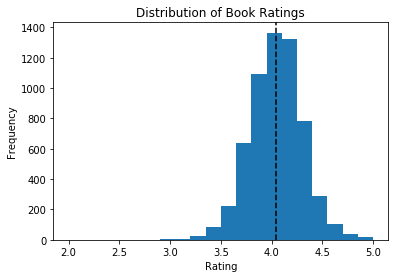

In [31]:
#Generate histograms using the format df.YOUR_CHOICE_OF_COLUMN_NAME.hist(bins=YOUR_CHOICE_OF_BIN_SIZE)

df.rating.hist(bins = 20, grid = False)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Book Ratings')
plt.axvline(x = df.rating.mean(), ymin = 0, ymax = 1500, c = 'k', linestyle = 'dashed')

plt.show()

The average rating is roughly 4.0, and the ratings are roughly normally distributed around that value. The high average rating (given that ratings are out of 5) makes sense given that this is a list of the "best" books on Goodreads.

If your histograms appear strange or counter-intuitive, make appropriate adjustments in the data and re-visualize.

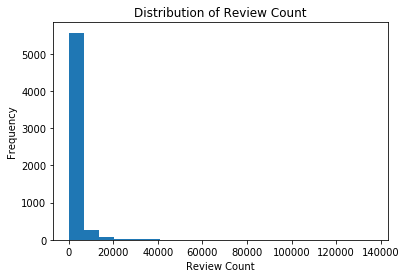

In [32]:
#Generate histograms using the format df.YOUR_CHOICE_OF_COLUMN_NAME.hist(bins=YOUR_CHOICE_OF_BIN_SIZE)

df.review_count.hist(bins = 20, grid = False)
plt.xlabel('Review Count')
plt.ylabel('Frequency')
plt.title('Distribution of Review Count')

plt.show()

The distribution of `review_count` skews extremely far to the right. Let's remove some outliers:

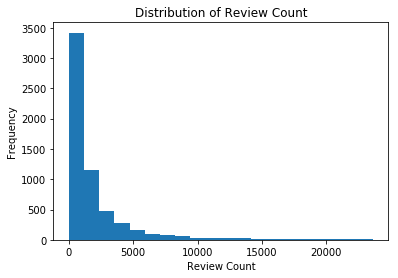

In [33]:
df.review_count[df.review_count < df.review_count.quantile(.99)].hist(bins = 20, grid = False)
plt.xlabel('Review Count')
plt.ylabel('Frequency')
plt.title('Distribution of Review Count')

plt.show()

Still skewed quite far to the right - note that by removing the top 1 percentile of review counts, the maximum value has gone from 140000 to roughly 20000.


## Part 5:  Determining the Best Books 

This is an example of an analysis of the "grouped property" type.

Think of some reasonable definitions of what it could mean to be a "best book." (After all, these are all the best books according to Goodreads)

* naive definition: the most highly-rated book
* less naive: account for number of ratings/reviews somehow

For example, we can determine the "best book" by year! Determine the best books in each year.

In [34]:
#Using .groupby, we can divide the dataframe into subsets by the values of 'year'.
#We can then iterate over these subsets
best_by_year = pd.DataFrame(columns = df.columns)

for year, subset in df.groupby('year'):
    max_rating = subset.rating.max()
    best_by_year = pd.concat([best_by_year, subset.loc[subset.rating == max_rating, :]])

Text(0.5,0,'Year')

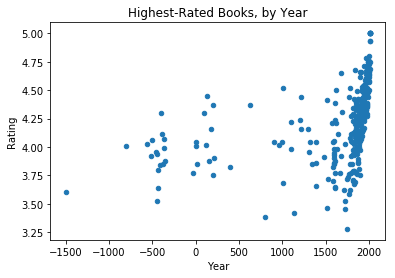

In [35]:
best_by_year[['year', 'rating']] = best_by_year[['year', 'rating']].applymap(float)

best_by_year[['year', 'rating']].plot.scatter(x = 'year', y = 'rating')
plt.title("Highest-Rated Books, by Year")
plt.ylabel("Rating")
plt.xlabel("Year")

The bulk of books on this list are from within the last 500 years, so the bulk of the data is concentrated on the far right side of this graph. Let's restrict to books published from 1500 onwards:

Text(0.5,0,'Year')

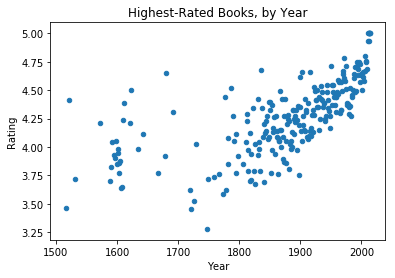

In [36]:
best_by_year.loc[best_by_year.year >= 1500, ['year', 'rating']].plot.scatter(x = 'year', y = 'rating')
plt.title("Highest-Rated Books, by Year")
plt.ylabel("Rating")
plt.xlabel("Year")

Here, we see a positive correlation between the year and the most highly-rated book from that year. This is in line with our general understanding of recency bias on review sites in general (see imdb, etc). It's also possible that books are just getting better over time.

It's possible that we might want to use an alternative definition of "best book" taking into account the number of reviews that a book has. Let's check the distribution of `review_count` among books that we found with the naive definition of "best book":

In [37]:
best_by_year[['rating_count', 'review_count']] = best_by_year[['rating_count', 'review_count']].applymap(int)
best_by_year.describe()

,rating,review_count,year,rating_count
count,301.000000,301.000000,301.000000,3.010000e+02
mean,4.212159,1279.514950,1611.664452,5.390494e+04
std,0.334568,2982.422444,664.165283,1.355059e+05
min,3.280000,0.000000,-1500.000000,6.000000e+00
25%,3.980000,185.000000,1667.000000,4.266000e+03
50%,4.230000,427.000000,1871.000000,1.467800e+04
75%,4.440000,1047.000000,1945.000000,4.776100e+04
max,5.000000,34772.000000,2014.000000,1.388992e+06


Let's the books that have less than 10 reviews (which seems extremely low, since the average value of `review_count` over the entire dataset is around 2300):

In [38]:
best_by_year.loc[best_by_year.review_count < 10, :]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name,author,genres
5404,4.37,8,098006810X,good_reads:book,https://www.goodreads.com/author/show/2051713....,201.0,/genres/philosophy,dir55/4934651-fe-fi-foe-comes.html,19,Fe Fi FOE Comes,William C Samples,philosophy
2920,4.93,6,1453634819,good_reads:book,https://www.goodreads.com/author/show/4808225....,2010.0,,dir30/11187861-the-years-distilled.html,28,The Years Distilled,Dennis Sharpe,
2909,5.00,0,0983002215,good_reads:book,https://www.goodreads.com/author/show/6589034....,2011.0,,dir30/16200303-family-secrets.html,9,Family Secrets,Rebekah McClew,
2145,5.00,3,1300589469,good_reads:book,https://www.goodreads.com/author/show/6906561....,2012.0,,dir22/17287259-a-book-about-absolutely-nothing...,63,A Book About Absolutely Nothing.,I M Nobody,
2903,5.00,0,0983002282,good_reads:book,https://www.goodreads.com/author/show/6589034....,2012.0,,dir30/17608096-obscured-darkness.html,8,Obscured Darkness (Family Secrets #2),Rebekah McClew,
4473,5.00,0,,good_reads:book,https://www.goodreads.com/author/show/6896621....,2012.0,,dir45/17259227-patience-s-love.html,7,Patience's Love,Ronda Paige,
5692,5.00,0,,good_reads:book,https://www.goodreads.com/author/show/5989528....,2012.0,,dir57/14288412-abstraction-in-theory---laws-of...,6,Abstraction In Theory - Laws Of Physical Trans...,Subhajit Ganguly,
3712,4.93,7,1781843457,good_reads:book,https://www.goodreads.com/author/show/5014793....,2013.0,/genres/fantasy|/genres/romance|/genres/suspen...,dir38/18080358-blade-heart.html,15,Blade Heart,Chris Lange,fantasy|romance|suspense|adventure|romance|fan...
5564,5.00,9,,good_reads:book,https://www.goodreads.com/author/show/7738947....,2014.0,/genres/romance|/genres/new-adult,dir56/21902777-untainted.html,14,"Untainted (Photographer Trilogy, #3)",Sarah Robinson,romance|new-adult


It seems as if some of the books that we pulled were books that a few people rated extremely highly; to account for this, let's restrict our definition of best book to the most highly rated book that has at least 100 reviews (which given the average value of `review_count` seems like a reasonable threshold):

In [39]:
new_best_by_year = pd.DataFrame(columns = df.columns)

for year, subset in df.groupby('year'):
    new_subset = subset.loc[subset.review_count >= 100, :]
    max_rating = new_subset.rating.max()
    new_best_by_year = pd.concat([new_best_by_year, subset.loc[subset.rating == max_rating, :]])

Text(0.5,0,'Year')

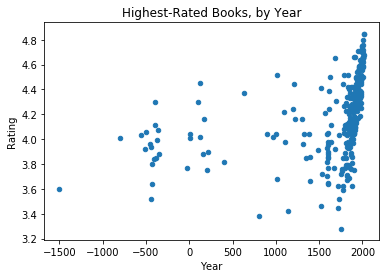

In [40]:
new_best_by_year[['year', 'rating']] = new_best_by_year[['year', 'rating']].applymap(float)

new_best_by_year[['year', 'rating']].plot.scatter(x = 'year', y = 'rating')
plt.title("Highest-Rated Books, by Year")
plt.ylabel("Rating")
plt.xlabel("Year")

Again, let's restrict our view to books published at or after 1500:

Text(0.5,0,'Year')

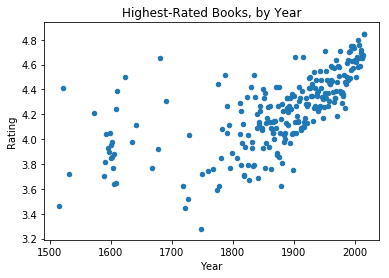

In [41]:
new_best_by_year.loc[new_best_by_year.year >= 1500, ['year', 'rating']].plot.scatter(x = 'year', y = 'rating')
plt.title("Highest-Rated Books, by Year")
plt.ylabel("Rating")
plt.xlabel("Year")

We see the same positive correlation that we saw with the previous definition.

Try this for few other definitions of the "best book" using `.groupby`.

## Part 6:  Trends in Popularity of Genres 

This is an example of an analysis of the "grouped property" type.

There are a lot of questions you could ask about genres.
* Which genre is currently the most popular?
* Better, based on our data, what draw conclusions can you draw about the time evolution of the popularity of each genre?

[15 minutes]

---

First we need to find the distinct genres in the dataframe. 

To do this, notice that each string is a pipe (|) separated list of genres. For each string, we ask if the genre is in that pipe separated list.  If it is, we return True, else False

**Hint: remember that python sets have unique (non-repeating) items.**

In [42]:
#Get the unique genres contained in the dataframe.
####### 
df['genre_set'] = df.genres.apply(lambda x: set(x.split('|')))
####### 

In [43]:
df.genre_set.head()

0    {dystopia, apocalyptic, book-club, romance, sc...
1    {fiction, magic, young-adult, science-fiction-...
2    {fiction, romance, supernatural, paranormal, p...
3    {fiction, book-club, read-for-school, literatu...
4    {fiction, british-literature, academic, romanc...
Name: genre_set, dtype: object

In [44]:
unique_genres = set()

for sets in df.genre_set.values:
    unique_genres = unique_genres | sets
    
len(unique_genres)

538

**What happens if we add a column to the dataframe for each genre?** We would need to add 538 columns to the dataframe, with each column indicating whether or not the book is of that genre.

**Is this way of representing genre efficient? Allows for easy computation and visualization?** It's efficient in the sense that it would provide the most direct representation of that information in the dataset; it would abide by the principle that columns should represent atomic properties of the data that cannot be further decomposed.

**Are there other ways to represent genre information in the dataframe that allow for each visualization?** Since there are so many genres, and most books are only a few genres, it would be possible to store the genre information similar to how a sparse matrix of zeros and ones would be stored - the dataframe would have one column containing a list of the genre positions that apply to the book. While this is in some sense more elegant, it would require a complete mapping of genres to list positions, so it would be very clunky.

Another way would be to find the maximum number of genres that any book in the dataframe has, then adding that many columns to the dataframe, with each column containing the distinct genres of each book. This is a good "in-between" solution, but it would result in many, many missing values, since most books will likely have fewer distinct genres than the maximum number. This means that we would also occasionally need to add additional columns to the dataframe to account for books belonging to more unique genres.

In [45]:
def genre_check(check, genres):
    return check in genres

In [46]:
df.genre_set.apply(lambda x: genre_check('science-fiction', x)).head()

0     True
1    False
2    False
3    False
4    False
Name: genre_set, dtype: bool

In [47]:
#Add a column for each genre
####### 
for genre in unique_genres:
    df[genre] = df.genre_set.apply(lambda x: genre_check(genre, x))
####### 
df.shape

(5993, 551)

Now explore some ways to visualize the genres represented in the dataframe. 

For example, you might ask which is the most represented genre.

In [48]:
genre_counts = df[list(unique_genres)].sum(axis = 0).sort_values(ascending = False)
genre_counts.head(10)

fiction         4362
fantasy         2742
romance         2228
young-adult     2132
literature      1609
classics        1584
novels          1487
contemporary    1309
adult           1211
paranormal      1201
dtype: int64

We can use the method from last section to track genre popularity over time.

In [49]:
#Explore different ways to visualize information about the genres in the dataframe
#######
genre_dfs = {}

for genre in genre_counts.head(10).index:
    genre_by_year = pd.DataFrame(columns = ['year', 'count'])
    cumulative = 0
    
    for year, subset in df.loc[df[genre] == True, :].groupby('year'):
        cumulative += len(subset)
        genre_by_year = pd.concat([genre_by_year, pd.DataFrame.from_dict({'year' : [year], 'count' : [cumulative]})])
        
    genre_dfs[genre] = genre_by_year
####### 

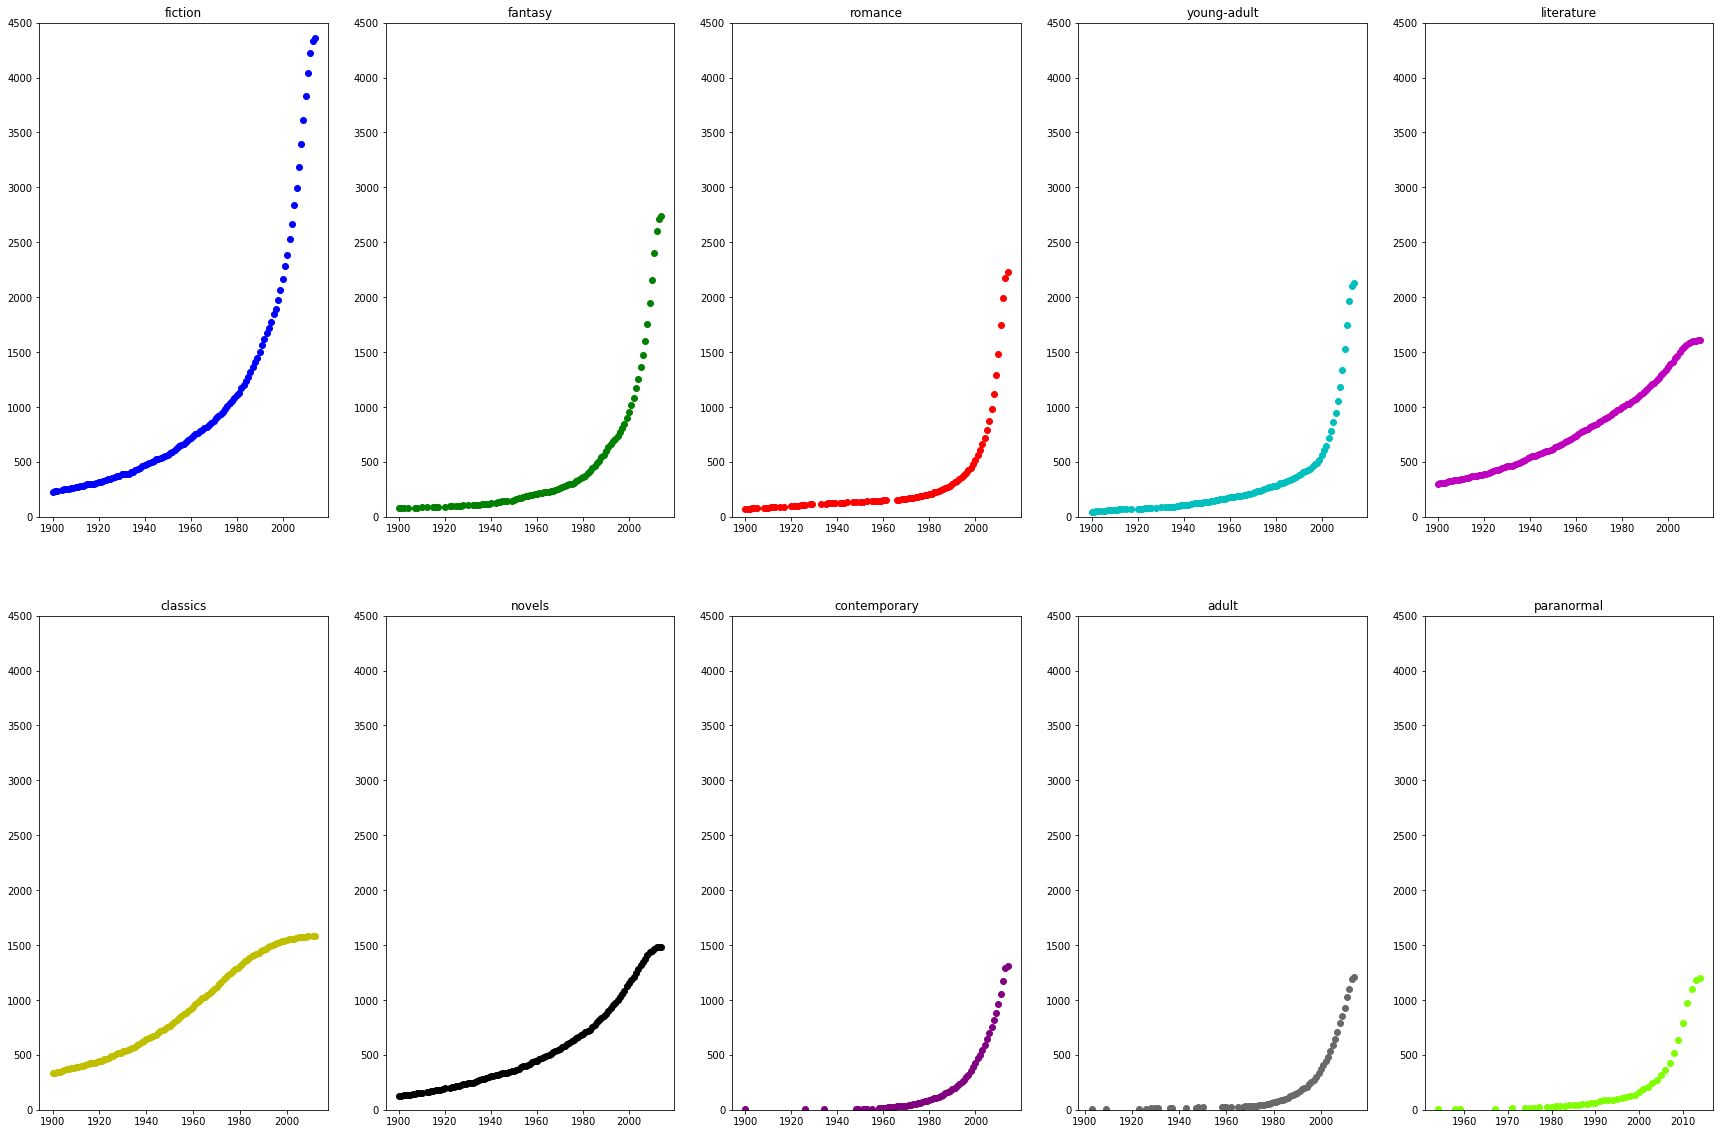

In [50]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple', 'dimgrey', 'chartreuse']

fig, ax = plt.subplots(nrows = 2, ncols = 5, figsize = (30, 20))
ax_iterator = ax.flatten()

for genre, axis, color in zip(genre_dfs, ax_iterator, colors):
    genre_dfs[genre] = genre_dfs[genre].applymap(float)
    axis.scatter(data = genre_dfs[genre].loc[genre_dfs[genre].year >= 1900, :], x = 'year', y = 'count', c = color)
    axis.set_title(genre)
    axis.set_ylim(0, 4500)

In [51]:
ya_grouped = df.loc[df['young-adult'] == True, :].groupby('year')
ya_by_year = pd.DataFrame(columns = df.columns)

for year, subset in ya_grouped:
    max_rating = subset.rating.max()
    ya_by_year = pd.concat([ya_by_year, subset.loc[subset.rating == max_rating, :]])

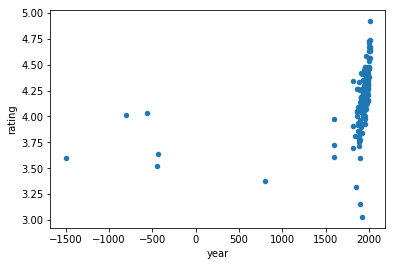

In [52]:
ya_by_year[['year', 'rating']] = ya_by_year[['year', 'rating']].applymap(float)

ya_by_year.plot.scatter(x = 'year', y = 'rating')

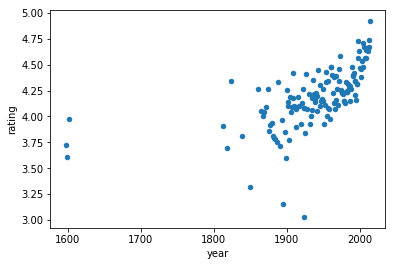

In [53]:
ya_by_year.loc[ya_by_year.year >= 1500, :].plot.scatter(x = 'year', y = 'rating')

### Part 6.1: What can you conclude from the above visualizations?

Pick two or three genres and describe how the popularity of these genres fluctuates with time.  

In [54]:
genres = {'fantasy' : None, 'romance' : None, 'young-adult' : None}

for genre in genres:
    genre_by_year = pd.DataFrame(columns = ['year', 'count'])
    
    for year, subset in df.loc[df[genre] == True, :].groupby('year'):
        genre_by_year = pd.concat([genre_by_year, pd.DataFrame({'year' : [year], 'count' : [len(subset)]})])
        
    genres[genre] = genre_by_year

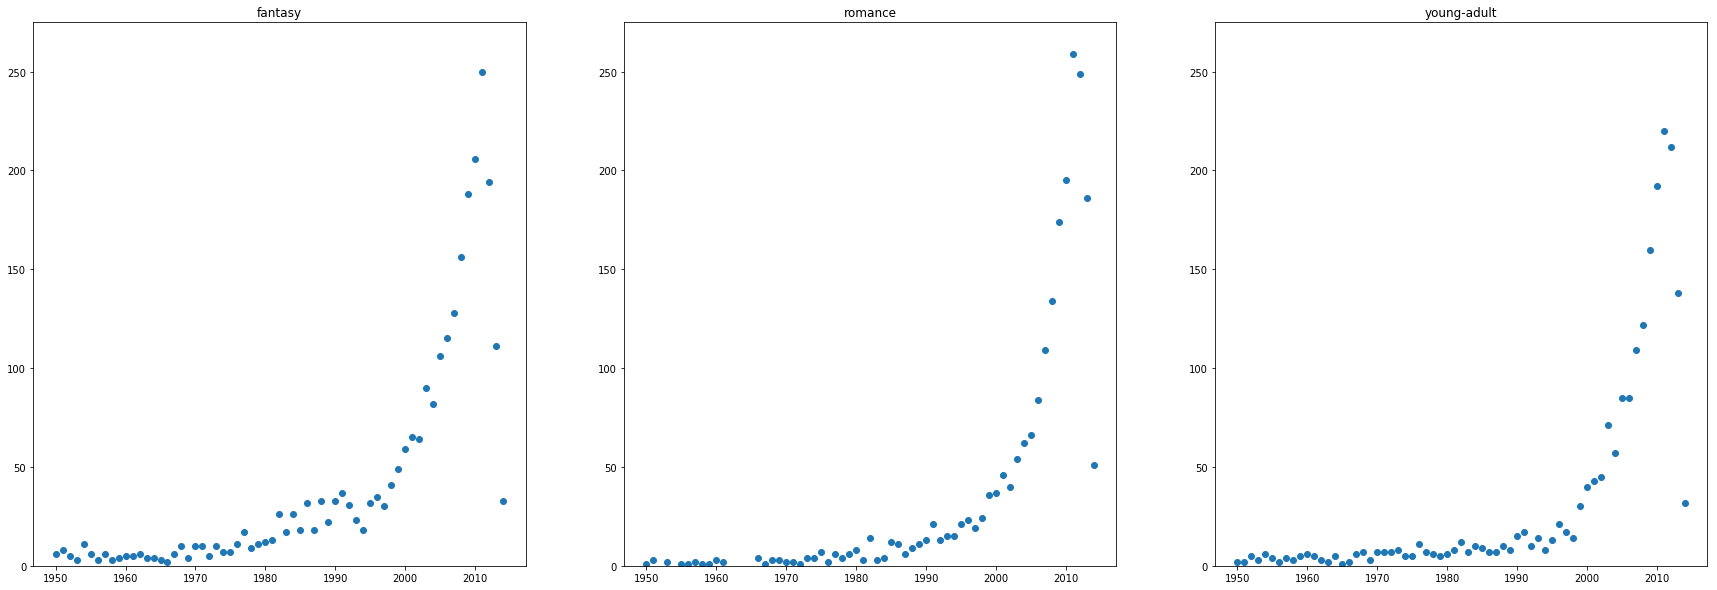

In [66]:
fig, ax = plt.subplots(ncols = 3, figsize = (30, 10))

for genre, axis in zip(genres, ax.flatten()):
    axis.scatter(data = genres[genre].loc[genres[genre].year >= 1950, :], x = 'year', y = 'count')
    axis.set_title(genre)
    axis.set_ylim(0, 275)

There is a category called Paranormal Romance!!!!!

In [67]:
df.loc[df['paranormal-romance'] == True, :].describe()

,rating,review_count,year,rating_count
count,628.000000,628.000000,628.000000,6.280000e+02
mean,4.093392,1920.679936,2008.595541,3.850889e+04
std,0.234676,4389.906959,4.275830,1.183043e+05
min,3.450000,5.000000,1989.000000,3.100000e+01
25%,3.920000,564.750000,2008.000000,9.715750e+03
50%,4.110000,977.500000,2010.000000,1.854800e+04
75%,4.270000,1879.250000,2011.000000,3.606300e+04
max,4.720000,85746.000000,2014.000000,2.579564e+06


In [69]:
pop_by_year = pd.DataFrame(columns = ['year', 'rating', 'review_count', 'rating_count'])

for year, subset in df.loc[df['paranormal-romance'] == True, :].groupby('year'):
    max_rating = subset.rating.max()
    max_review_count = subset.review_count.max()
    max_rating_count = subset.rating_count.max()
    pop_by_year = pd.concat([pop_by_year, pd.DataFrame({'year': [year], 'rating' : [max_rating], 'review_count' : [max_review_count], 'rating_count' : [max_rating_count]})])

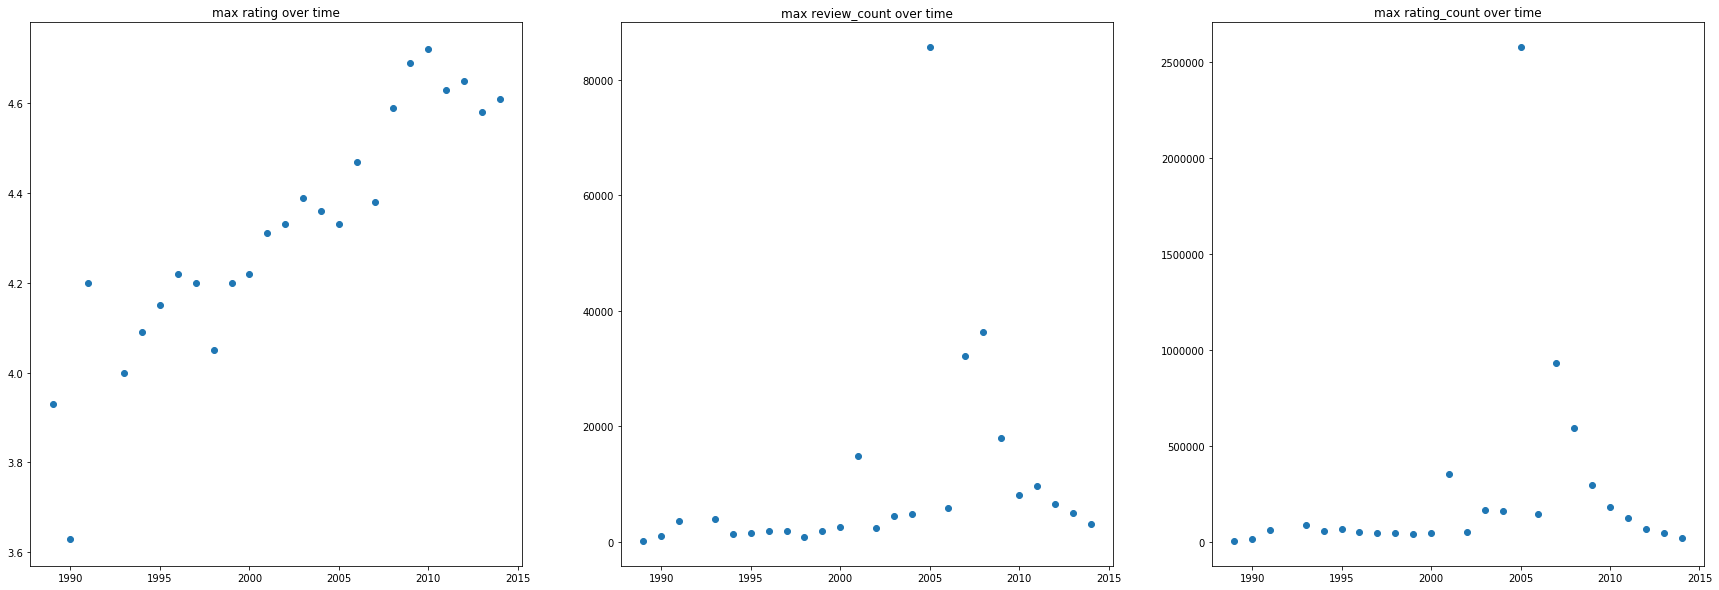

In [72]:
cols = ['rating', 'review_count', 'rating_count']
fig, ax = plt.subplots(ncols = 3, figsize = (30, 10))

for col, axis in zip(cols, ax.flatten()):
    axis.scatter(data = pop_by_year, x = 'year', y = col)
    axis.set_title('max {} over time'.format(col))

There's a huge spike in max review and rating count in the mid-2000s. Let's pin down when...

In [81]:
pop_by_year.sort_values('review_count', ascending = False).head()

,rating,rating_count,review_count,year
0,4.33,2579564,85746,2005
0,4.59,595689,36310,2008
0,4.38,932291,32182,2007
0,4.69,295281,17990,2009
0,4.31,353620,14914,2001


What book came out in 2005?...

In [79]:
df.loc[(df['paranormal-romance'] == True) & (df['year'] == 2005), ['review_count', 'name']].sort_values('review_count', ascending = False)

,review_count,name
2,85746,"Twilight (Twilight, #1)"
319,8347,"Dark Lover (Black Dagger Brotherhood, #1)"
650,3221,"Dead as a Doornail (Sookie Stackhouse, #5)"
3902,1606,"A Certain Slant of Light (Light, #1)"
5236,1167,Kitty and the Midnight Hour (Kitty Norville #1)
2781,1039,A Quick Bite (Argeneau #1)
2383,742,Unleash the Night (Were-Hunter #2)
3765,653,"Sins of the Night (Dark-Hunter, #6)"
3539,647,"Spell of the Highlander (Highlander, #7)"
3094,615,Haunted (Women of the Otherworld #5)


...oh.